In [146]:
# Dados para testar as funções
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
from scipy import stats


In [147]:
path_input = r"C:\Users\MarceloPereiraMarcoP\Desktop\DataViz\house-prices-advanced-regression-techniques"
#link dos dados
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

In [148]:
data = pd.read_csv(path_input + "/train.csv")

In [151]:
df = data[["GrLivArea","SalePrice"]]

In [152]:
df["SalePrice"] = df["SalePrice"] /1000
df["GrLivArea"] = df["GrLivArea"] /10.764

In [153]:
df.describe()

,GrLivArea,SalePrice
count,1460.000000,1460.000000
mean,140.790013,180.921196
std,48.818319,79.442503
min,31.029357,34.900000
25%,104.933110,129.975000
50%,136.008919,163.000000
75%,165.064103,214.000000
max,524.154589,755.000000


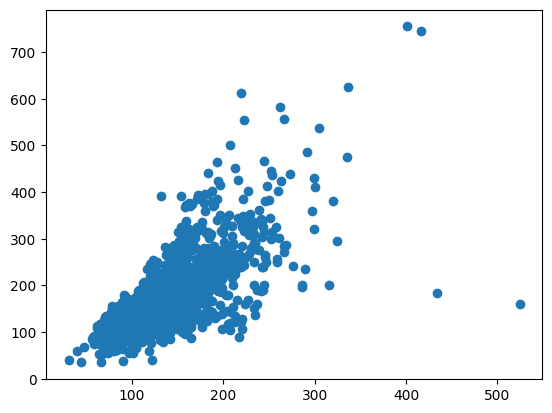

In [174]:
# plot
plt.rcdefaults()
plt.plot( 'GrLivArea','SalePrice',  data=df, linestyle='none', marker='o')
plt.show()


In [156]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

In [187]:
def scatter_plot(x, 
                 y, 
                 title_label, 
                 x_label, 
                 y_label):
    """"Plota um gráfico de linhas com dados de previsão e de teste. 
    Args:
          previsao(Series): Serie com os dados de previsão.
          teste(Series): Serie com os dados de teste.
          previsao_label(str): Nome do label da previsão na legenda.
          teste_label(str): Nome do label de teste na legenda.
          title_label(str): título do gráfico.
          x_label(str): Nome do label do eixo X.
          y_label(str): Nome do label do eixo Y.
    """
    # Determina o estilo

    # Determina o tamanho do gráfico.
    sns.set(rc={'figure.figsize':(10,6)})  
    sns.set_style("white", {"axes.facecolor": ".95"}) 
    plt.rcParams["axes.labelsize"] = 6


    pearson = r2(df["GrLivArea"],df["SalePrice"])

    ax = sns.regplot(x=df["GrLivArea"],
                     y=df["SalePrice"],
                     robust = False,
                     scatter_kws={"color":'#5eaaa8',"alpha":0.2,"s":50},
                     line_kws={"color":'#eb5e0b',"alpha":0.9,"lw":1},
                     label="Correlação Pearson = {0:.5f}".format(pearson))

    ax.legend(loc="best")

    ax.set_title(title_label, size = 22)
    ax.set_xlabel(x_label, horizontalalignment='left', x=0, size = 18)
    ax.set_ylabel(y_label,horizontalalignment='left', y=0, size = 18)
    ax.grid(b=True, which='major', color='w', linewidth=1.0)

    
    


    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.ylim(ymin=0)  

    #Mostra o gráfico
    plt.show()

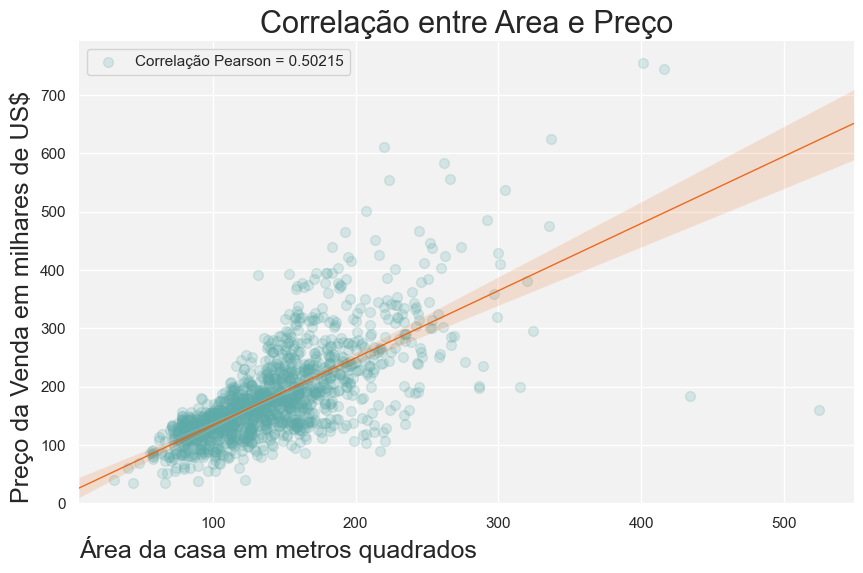

In [188]:
scatter_plot(df["GrLivArea"], 
             df["SalePrice"], 
             "Correlação entre Area e Preço", 
             "Área da casa em metros quadrados", 
             "Preço da Venda em milhares de US$")